In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from transformers import Wav2Vec2Processor, Wav2Vec2Model
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from transformers import Wav2Vec2Processor, Wav2Vec2Model
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [ ]:
labels_file = '/content/drive/MyDrive/ICBHI_final_database/labels.txt'


In [ ]:
def load_name_to_dataframe(embedding_dir):
    labels_df = pd.read_csv(labels_file, sep='\t', header=None, names=['id', 'label'])

    # Create a dictionary mapping from ID to label
    id_to_label = dict(zip(labels_df['id'], labels_df['label']))

    data = []
    for root, _, files in os.walk(embedding_dir):
        for file in files:
            if file.endswith(".wav"):
                file_id = int(file.split('_')[0])
                label = id_to_label[file_id]
                file_path = os.path.join(root, file)
                data.append({
                    "id": file_id,
                    "file_path": file_path,
                    "label": label
                })

    df = pd.DataFrame(data)
    return df

In [ ]:
df_names = load_name_to_dataframe("/content/drive/MyDrive/ICBHI_final_database/ICBHI_final_database")

In [ ]:
df_names.head()

,id,file_path,label
0,204,/content/drive/MyDrive/ICBHI_final_database/IC...,COPD
1,204,/content/drive/MyDrive/ICBHI_final_database/IC...,COPD
2,204,/content/drive/MyDrive/ICBHI_final_database/IC...,COPD
3,204,/content/drive/MyDrive/ICBHI_final_database/IC...,COPD
4,204,/content/drive/MyDrive/ICBHI_final_database/IC...,COPD


In [ ]:
copd_df = df_names[df_names['label'] == 'COPD']

In [ ]:
copd_df['label'].value_counts()

,count
label,
COPD,793


In [ ]:
# prompt: extract the rows with copd label andcopy the audios in file path to another folder with a custom name

import pandas as pd
import os
import shutil

# Assuming df_names is already defined as in the provided code

def extract_and_copy_copd(copd_df, source_dir, destination_dir):
    """
    Extracts rows with 'COPD' label and copies corresponding audio files.

    Args:
        df: DataFrame containing file paths and labels.
        source_dir: The directory containing the audio files.
        destination_dir: The directory to copy the COPD audio files to.
    """

    if not os.path.exists(destination_dir):
        os.makedirs(destination_dir)

    for index, row in copd_df.iterrows():
        source_path = row['file_path']
        # Extract filename from path
        filename = "COPD_"+os.path.basename(source_path)
        print(filename)
        #return False
        destination_path = os.path.join(destination_dir, filename)

        try:
            shutil.copy2(source_path, destination_path) # copy2 preserves metadata
            print(f"Copied {filename} to {destination_path}")
        except FileNotFoundError:
            print(f"File not found: {source_path}")
        except Exception as e:
            print(f"Error copying {filename}: {e}")


# Example usage (replace with your actual paths):
source_audio_directory = "/content/drive/MyDrive/ICBHI_final_database/ICBHI_final_database" # Update with your source directory
destination_audio_directory = "/content/drive/MyDrive/ICBHI_final_database/augmented_audio" # Update with your destination directory

extract_and_copy_copd(df_names, source_audio_directory, destination_audio_directory)


COPD_204_2b5_Al_mc_AKGC417L.wav
Copied COPD_204_2b5_Al_mc_AKGC417L.wav to /content/drive/MyDrive/ICBHI_final_database/augmented_audio/COPD_204_2b5_Al_mc_AKGC417L.wav
COPD_204_7p5_Ar_mc_AKGC417L.wav
Copied COPD_204_7p5_Ar_mc_AKGC417L.wav to /content/drive/MyDrive/ICBHI_final_database/augmented_audio/COPD_204_7p5_Ar_mc_AKGC417L.wav
COPD_204_7p5_Ll_mc_AKGC417L.wav
Copied COPD_204_7p5_Ll_mc_AKGC417L.wav to /content/drive/MyDrive/ICBHI_final_database/augmented_audio/COPD_204_7p5_Ll_mc_AKGC417L.wav
COPD_204_7p5_Lr_mc_AKGC417L.wav
Copied COPD_204_7p5_Lr_mc_AKGC417L.wav to /content/drive/MyDrive/ICBHI_final_database/augmented_audio/COPD_204_7p5_Lr_mc_AKGC417L.wav
COPD_204_7p5_Tc_mc_AKGC417L.wav
Copied COPD_204_7p5_Tc_mc_AKGC417L.wav to /content/drive/MyDrive/ICBHI_final_database/augmented_audio/COPD_204_7p5_Tc_mc_AKGC417L.wav
COPD_205_1b3_Al_mc_AKGC417L.wav
Copied COPD_205_1b3_Al_mc_AKGC417L.wav to /content/drive/MyDrive/ICBHI_final_database/augmented_audio/COPD_205_1b3_Al_mc_AKGC417L.wav
COPD

## Audio Embeddings

In [ ]:
import os

In [ ]:
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
wav2vec_model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import os
import pandas as pd
import torch
import torchaudio
from transformers import Wav2Vec2Processor, Wav2Vec2Model
from tqdm import tqdm

# Configuration
AUDIO_DIR = "/content/drive/MyDrive/ICBHI_final_database/augmented_audio"
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
SAMPLE_RATE = 16000  # Wav2Vec expects 16kHz audio

# Initialize Wav2Vec model
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h").to(DEVICE)

def extract_label_from_filename(filename):
    """Extract class label from filename (part before first underscore)"""
    return filename.split('_')[0]

def load_and_resample_audio(filepath, target_sample_rate=SAMPLE_RATE):
    """Load audio file and resample to target rate"""
    waveform, sample_rate = torchaudio.load(filepath)
    if sample_rate != target_sample_rate:
        resampler = torchaudio.transforms.Resample(sample_rate, target_sample_rate)
        waveform = resampler(waveform)
    return waveform.squeeze(), target_sample_rate

def get_wav2vec_embedding(waveform, sample_rate):
    """Generate Wav2Vec embedding for audio waveform"""
    # Process the audio
    inputs = processor(waveform, sampling_rate=sample_rate, return_tensors="pt", padding=True)

    # Move to device and get embeddings
    with torch.no_grad():
        inputs = {k: v.to(DEVICE) for k, v in inputs.items()}
        outputs = model(**inputs)

    # Use last hidden state as embedding (mean across time dimension)
    embedding = outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()
    return embedding

def process_audio_folder(folder_path):
    """Process all audio files in folder and return DataFrame with embeddings"""
    data = []

    # Get all audio files in folder
    audio_files = [f for f in os.listdir(folder_path) if f.endswith(('.wav', '.mp3', '.flac'))]

    for filename in tqdm(audio_files, desc="Processing audio files"):
        try:
            # Extract label from filename
            label = extract_label_from_filename(filename)

            # Load and resample audio
            filepath = os.path.join(folder_path, filename)
            waveform, sample_rate = load_and_resample_audio(filepath)

            # Get embedding
            embedding = get_wav2vec_embedding(waveform, sample_rate)

            # Store results
            data.append({
                'filename': filename,
                'label': label,
                'embedding': embedding
            })

        except Exception as e:
            print(f"Error processing {filename}: {str(e)}")
            continue

    # Create DataFrame
    df = pd.DataFrame(data)
    return df




Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
df = process_audio_folder(AUDIO_DIR)

Processing audio files: 100%|██████████| 6344/6344 [04:45<00:00, 22.24it/s]


In [ ]:
df.head()

In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
df_audio = df[['label','embedding']]

In [ ]:
%pip install audiomentations torchaudio librosa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of numpy-minmax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of numpy-rms to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 117.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 98.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.3 MB/s 

In [ ]:
df_audio.head()

,label,embedding
0,LRTI,"[-0.09725039, -0.03294873, 0.25046045, -0.0501..."
1,LRTI,"[-0.119179636, 0.036860026, 0.14773089, -0.045..."
2,LRTI,"[-0.053739958, -0.025142455, 0.16993481, -0.05..."
3,LRTI,"[-0.1108839, 0.029857112, 0.15124863, -0.06170..."
4,LRTI,"[-0.054015238, 0.032014832, -0.04993601, -0.01..."


In [ ]:
df_audio['label'].value_counts()


,count
label,
COPD,920
Asthma,792
LRTI,791
Bronchiolitis,780
Bronchiectasis,777
URTI,770
Healthy,758
Pneumonia,756


In [ ]:
# prompt: convert label to index using label encorder

from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame with a 'label' column
label_encoder = LabelEncoder()
df_audio['label'] = label_encoder.fit_transform(df_audio['label'])


print(label_encoder.classes_) # This will show you which number corresponds to which label
df_audio.head()


['Asthma' 'Bronchiectasis' 'Bronchiolitis' 'Healthy' 'LRTI' 'Pneumonia'
 'URTI']


<ipython-input-13-99cee8374f5c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_audio['label'] = label_encoder.fit_transform(df_audio['label'])


,label,embedding
0,4,"[-0.09725039, -0.03294873, 0.25046045, -0.0501..."
1,4,"[-0.119179636, 0.036860026, 0.14773089, -0.045..."
2,4,"[-0.053739958, -0.025142455, 0.16993481, -0.05..."
3,4,"[-0.1108839, 0.029857112, 0.15124863, -0.06170..."
4,4,"[-0.054015238, 0.032014832, -0.04993601, -0.01..."


In [ ]:
print("Class mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Class mapping: {'Asthma': 0, 'Bronchiectasis': 1, 'Bronchiolitis': 2, 'Healthy': 3, 'LRTI': 4, 'Pneumonia': 5, 'URTI': 6}


In [ ]:
df_audio['label'] = label_encoder.inverse_transform(df_audio['label'])

In [ ]:
import torch
import torch.nn as nn
from transformers import BertModel, BertConfig
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm

class AudioTransformerClassifier(nn.Module):
    def __init__(self, input_dim=768, hidden_dim=256, num_classes=8, num_layers=4, num_heads=8):
        super().__init__()

        # Projection layer to match transformer's expected dimension
        self.projection = nn.Linear(input_dim, hidden_dim)

        # Transformer configuration
        config = BertConfig(
            hidden_size=hidden_dim,
            num_hidden_layers=num_layers,
            num_attention_heads=num_heads,
            intermediate_size=hidden_dim*4,
            max_position_embeddings=512,  # Can be adjusted
            hidden_dropout_prob=0.1,
            attention_probs_dropout_prob=0.1
        )

        # Transformer encoder
        self.transformer = BertModel(config)

        # Classification head
        self.classifier = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(hidden_dim, num_classes)
        )

    def forward(self, x):
        # x shape: (batch_size, embedding_dim)

        # Add sequence dimension (batch_size, 1, embedding_dim)
        x = x.unsqueeze(1)

        # Project to hidden dimension
        x = self.projection(x)

        # Transformer expects (batch_size, seq_len, hidden_dim)
        transformer_output = self.transformer(inputs_embeds=x)

        # Get the [CLS] token equivalent (mean pooling in our case)
        pooled_output = transformer_output.last_hidden_state.mean(dim=1)

        # Classify
        logits = self.classifier(pooled_output)

        return logits

In [ ]:
class AudioEmbeddingDataset(Dataset):
    def __init__(self, dataframe):
        self.data = dataframe
        self.labels = pd.get_dummies(dataframe['label']).values
        self.embeddings = np.stack(dataframe['embedding'].values)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        embedding = torch.tensor(self.embeddings[idx], dtype=torch.float32)
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return embedding, label

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def train_model_with_plots(train_dataset, val_dataset, num_epochs=20, batch_size=32, learning_rate=3e-5):
    # Initialize tracking
    history = {
        'train_loss': [],
        'train_acc': [],
        'val_loss': [],
        'val_acc': [],
        'all_true': [],
        'all_preds': []
    }

    # Initialize model
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = AudioTransformerClassifier().to(device)

    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)

    # Data loaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    best_val_acc = 0.0

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        correct = 0
        total = 0

        # Training loop
        for embeddings, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            embeddings = embeddings.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(embeddings)
            loss = criterion(outputs, labels.argmax(dim=1))

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Statistics
            train_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels.argmax(dim=1)).sum().item()

        scheduler.step()
        train_acc = 100. * correct / total
        train_loss = train_loss / len(train_loader)

        # Validation
        val_acc, val_loss, val_true, val_preds = evaluate(model, val_loader, criterion, device)

        # Update history
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        history['all_true'].extend(val_true)
        history['all_preds'].extend(val_preds)

        print(f"Epoch {epoch+1}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), "best_model.pth")

    # Generate plots
    generate_evaluation_plots(history, class_names=train_dataset.data['label'].unique())

    return model, history

def evaluate(model, data_loader, criterion, device):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    all_true = []
    all_preds = []

    with torch.no_grad():
        for embeddings, labels in data_loader:
            embeddings = embeddings.to(device)
            labels = labels.to(device)

            outputs = model(embeddings)
            loss = criterion(outputs, labels.argmax(dim=1))

            val_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels.argmax(dim=1)).sum().item()

            all_true.extend(labels.argmax(dim=1).cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    val_acc = 100. * correct / total
    val_loss = val_loss / len(data_loader)
    return val_acc, val_loss, all_true, all_preds

In [ ]:
def generate_evaluation_plots(history, class_names):
    plt.figure(figsize=(15, 10))

    # 1. Training & Validation Loss
    plt.subplot(2, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # 2. Training & Validation Accuracy
    plt.subplot(2, 2, 2)
    plt.plot(history['train_acc'], label='Train Accuracy')
    plt.plot(history['val_acc'], label='Validation Accuracy')
    plt.title('Training & Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True)

    # 3. Confusion Matrix
    plt.subplot(2, 2, 3)
    cm = confusion_matrix(history['all_true'], history['all_preds'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)

    # 4. Classification Report
    plt.subplot(2, 2, 4)
    report = classification_report(history['all_true'], history['all_preds'],
                                 target_names=class_names, output_dict=True)
    sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Greens')
    plt.title('Classification Report')
    plt.tight_layout()

    plt.savefig('training_evaluation.png')
    plt.show()

    # 5. Learning Curves (separate plot)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train')
    plt.plot(history['val_loss'], label='Validation')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Train')
    plt.plot(history['val_acc'], label='Validation')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.savefig('learning_curves.png')
    plt.show()

In [ ]:
df_train, df_val = train_test_split(df_audio, test_size=0.2, random_state=42)
train_dataset = AudioEmbeddingDataset(df_train)
val_dataset = AudioEmbeddingDataset(df_val)



Epoch 1/100: 100%|██████████| 159/159 [00:02<00:00, 75.06it/s]


Epoch 1: Train Loss: 2.0190, Train Acc: 21.71% | Val Loss: 1.8889, Val Acc: 34.20%


Epoch 2/100: 100%|██████████| 159/159 [00:01<00:00, 83.99it/s]


Epoch 2: Train Loss: 1.7755, Train Acc: 35.17% | Val Loss: 1.6356, Val Acc: 39.72%


Epoch 3/100: 100%|██████████| 159/159 [00:01<00:00, 82.71it/s]


Epoch 3: Train Loss: 1.5717, Train Acc: 42.54% | Val Loss: 1.4782, Val Acc: 47.52%


Epoch 4/100: 100%|██████████| 159/159 [00:01<00:00, 83.11it/s]


Epoch 4: Train Loss: 1.4247, Train Acc: 47.90% | Val Loss: 1.3581, Val Acc: 50.51%


Epoch 5/100: 100%|██████████| 159/159 [00:01<00:00, 81.36it/s]


Epoch 5: Train Loss: 1.3240, Train Acc: 52.28% | Val Loss: 1.2750, Val Acc: 53.11%


Epoch 6/100: 100%|██████████| 159/159 [00:01<00:00, 81.97it/s]


Epoch 6: Train Loss: 1.2413, Train Acc: 54.56% | Val Loss: 1.2213, Val Acc: 56.34%


Epoch 7/100: 100%|██████████| 159/159 [00:01<00:00, 82.98it/s]


Epoch 7: Train Loss: 1.1831, Train Acc: 57.06% | Val Loss: 1.1560, Val Acc: 58.39%


Epoch 8/100: 100%|██████████| 159/159 [00:01<00:00, 83.19it/s]


Epoch 8: Train Loss: 1.1287, Train Acc: 59.07% | Val Loss: 1.0946, Val Acc: 59.81%


Epoch 9/100: 100%|██████████| 159/159 [00:01<00:00, 83.17it/s]


Epoch 9: Train Loss: 1.0825, Train Acc: 60.33% | Val Loss: 1.0872, Val Acc: 62.49%


Epoch 10/100: 100%|██████████| 159/159 [00:01<00:00, 82.51it/s]


Epoch 10: Train Loss: 1.0424, Train Acc: 62.25% | Val Loss: 1.0473, Val Acc: 62.49%


Epoch 11/100: 100%|██████████| 159/159 [00:01<00:00, 82.53it/s]


Epoch 11: Train Loss: 0.9997, Train Acc: 63.21% | Val Loss: 1.0083, Val Acc: 63.04%


Epoch 12/100: 100%|██████████| 159/159 [00:01<00:00, 83.89it/s]


Epoch 12: Train Loss: 0.9604, Train Acc: 64.91% | Val Loss: 0.9597, Val Acc: 65.09%


Epoch 13/100: 100%|██████████| 159/159 [00:01<00:00, 83.65it/s]


Epoch 13: Train Loss: 0.9268, Train Acc: 65.71% | Val Loss: 0.9442, Val Acc: 65.80%


Epoch 14/100: 100%|██████████| 159/159 [00:01<00:00, 83.90it/s]


Epoch 14: Train Loss: 0.8999, Train Acc: 67.25% | Val Loss: 0.9148, Val Acc: 66.04%


Epoch 15/100: 100%|██████████| 159/159 [00:01<00:00, 83.29it/s]


Epoch 15: Train Loss: 0.9004, Train Acc: 66.70% | Val Loss: 0.9322, Val Acc: 65.01%


Epoch 16/100: 100%|██████████| 159/159 [00:01<00:00, 83.25it/s]


Epoch 16: Train Loss: 0.8446, Train Acc: 69.28% | Val Loss: 0.8776, Val Acc: 67.45%


Epoch 17/100: 100%|██████████| 159/159 [00:01<00:00, 84.04it/s]


Epoch 17: Train Loss: 0.8287, Train Acc: 69.95% | Val Loss: 0.8507, Val Acc: 67.53%


Epoch 18/100: 100%|██████████| 159/159 [00:01<00:00, 83.01it/s]


Epoch 18: Train Loss: 0.8006, Train Acc: 71.21% | Val Loss: 0.8513, Val Acc: 68.79%


Epoch 19/100: 100%|██████████| 159/159 [00:01<00:00, 84.00it/s]


Epoch 19: Train Loss: 0.7815, Train Acc: 71.43% | Val Loss: 0.8358, Val Acc: 69.11%


Epoch 20/100: 100%|██████████| 159/159 [00:01<00:00, 81.78it/s]


Epoch 20: Train Loss: 0.7713, Train Acc: 71.96% | Val Loss: 0.8120, Val Acc: 71.39%


Epoch 21/100: 100%|██████████| 159/159 [00:01<00:00, 83.56it/s]


Epoch 21: Train Loss: 0.7508, Train Acc: 72.32% | Val Loss: 0.8129, Val Acc: 70.84%


Epoch 22/100: 100%|██████████| 159/159 [00:01<00:00, 81.75it/s]


Epoch 22: Train Loss: 0.7370, Train Acc: 72.69% | Val Loss: 0.7943, Val Acc: 70.45%


Epoch 23/100: 100%|██████████| 159/159 [00:01<00:00, 84.18it/s]


Epoch 23: Train Loss: 0.7143, Train Acc: 74.03% | Val Loss: 0.7796, Val Acc: 70.92%


Epoch 24/100: 100%|██████████| 159/159 [00:01<00:00, 83.49it/s]


Epoch 24: Train Loss: 0.6975, Train Acc: 74.82% | Val Loss: 0.7982, Val Acc: 71.16%


Epoch 25/100: 100%|██████████| 159/159 [00:01<00:00, 83.47it/s]


Epoch 25: Train Loss: 0.6970, Train Acc: 74.19% | Val Loss: 0.7419, Val Acc: 73.29%


Epoch 26/100: 100%|██████████| 159/159 [00:01<00:00, 83.08it/s]


Epoch 26: Train Loss: 0.6580, Train Acc: 76.45% | Val Loss: 0.7663, Val Acc: 72.42%


Epoch 27/100: 100%|██████████| 159/159 [00:01<00:00, 82.79it/s]


Epoch 27: Train Loss: 0.6556, Train Acc: 76.04% | Val Loss: 0.7192, Val Acc: 73.76%


Epoch 28/100: 100%|██████████| 159/159 [00:01<00:00, 82.35it/s]


Epoch 28: Train Loss: 0.6376, Train Acc: 76.18% | Val Loss: 0.7350, Val Acc: 73.44%


Epoch 29/100: 100%|██████████| 159/159 [00:01<00:00, 84.22it/s]


Epoch 29: Train Loss: 0.6301, Train Acc: 76.63% | Val Loss: 0.7207, Val Acc: 74.70%


Epoch 30/100: 100%|██████████| 159/159 [00:01<00:00, 83.85it/s]


Epoch 30: Train Loss: 0.6151, Train Acc: 77.73% | Val Loss: 0.7062, Val Acc: 74.39%


Epoch 31/100: 100%|██████████| 159/159 [00:01<00:00, 83.51it/s]


Epoch 31: Train Loss: 0.6057, Train Acc: 77.34% | Val Loss: 0.7504, Val Acc: 73.29%


Epoch 32/100: 100%|██████████| 159/159 [00:01<00:00, 83.25it/s]


Epoch 32: Train Loss: 0.6070, Train Acc: 77.91% | Val Loss: 0.7617, Val Acc: 72.03%


Epoch 33/100: 100%|██████████| 159/159 [00:01<00:00, 82.19it/s]


Epoch 33: Train Loss: 0.5962, Train Acc: 78.09% | Val Loss: 0.6981, Val Acc: 75.26%


Epoch 34/100: 100%|██████████| 159/159 [00:01<00:00, 82.49it/s]


Epoch 34: Train Loss: 0.5741, Train Acc: 79.27% | Val Loss: 0.7161, Val Acc: 74.23%


Epoch 35/100: 100%|██████████| 159/159 [00:01<00:00, 83.59it/s]


Epoch 35: Train Loss: 0.5771, Train Acc: 78.94% | Val Loss: 0.6680, Val Acc: 76.91%


Epoch 36/100: 100%|██████████| 159/159 [00:01<00:00, 83.63it/s]


Epoch 36: Train Loss: 0.5559, Train Acc: 79.67% | Val Loss: 0.6707, Val Acc: 75.41%


Epoch 37/100: 100%|██████████| 159/159 [00:01<00:00, 83.41it/s]


Epoch 37: Train Loss: 0.5407, Train Acc: 80.77% | Val Loss: 0.6917, Val Acc: 75.10%


Epoch 38/100: 100%|██████████| 159/159 [00:01<00:00, 82.54it/s]


Epoch 38: Train Loss: 0.5437, Train Acc: 79.94% | Val Loss: 0.6536, Val Acc: 76.75%


Epoch 39/100: 100%|██████████| 159/159 [00:01<00:00, 80.86it/s]


Epoch 39: Train Loss: 0.5237, Train Acc: 81.30% | Val Loss: 0.6539, Val Acc: 76.91%


Epoch 40/100: 100%|██████████| 159/159 [00:01<00:00, 84.09it/s]


Epoch 40: Train Loss: 0.5229, Train Acc: 80.61% | Val Loss: 0.6490, Val Acc: 77.15%


Epoch 41/100: 100%|██████████| 159/159 [00:01<00:00, 83.36it/s]


Epoch 41: Train Loss: 0.5127, Train Acc: 81.16% | Val Loss: 0.6449, Val Acc: 77.78%


Epoch 42/100: 100%|██████████| 159/159 [00:01<00:00, 83.18it/s]


Epoch 42: Train Loss: 0.5020, Train Acc: 81.73% | Val Loss: 0.6364, Val Acc: 77.78%


Epoch 43/100: 100%|██████████| 159/159 [00:01<00:00, 83.39it/s]


Epoch 43: Train Loss: 0.4903, Train Acc: 82.56% | Val Loss: 0.6504, Val Acc: 77.15%


Epoch 44/100: 100%|██████████| 159/159 [00:01<00:00, 82.27it/s]


Epoch 44: Train Loss: 0.4893, Train Acc: 82.42% | Val Loss: 0.6659, Val Acc: 76.12%


Epoch 45/100: 100%|██████████| 159/159 [00:01<00:00, 81.30it/s]


Epoch 45: Train Loss: 0.4734, Train Acc: 82.80% | Val Loss: 0.6664, Val Acc: 76.12%


Epoch 46/100: 100%|██████████| 159/159 [00:01<00:00, 83.53it/s]


Epoch 46: Train Loss: 0.4741, Train Acc: 82.82% | Val Loss: 0.6364, Val Acc: 78.25%


Epoch 47/100: 100%|██████████| 159/159 [00:01<00:00, 83.61it/s]


Epoch 47: Train Loss: 0.4629, Train Acc: 83.33% | Val Loss: 0.6357, Val Acc: 77.46%


Epoch 48/100: 100%|██████████| 159/159 [00:01<00:00, 82.81it/s]


Epoch 48: Train Loss: 0.4559, Train Acc: 83.68% | Val Loss: 0.6206, Val Acc: 78.33%


Epoch 49/100: 100%|██████████| 159/159 [00:01<00:00, 83.21it/s]


Epoch 49: Train Loss: 0.4448, Train Acc: 83.67% | Val Loss: 0.6120, Val Acc: 78.64%


Epoch 50/100: 100%|██████████| 159/159 [00:01<00:00, 83.22it/s]


Epoch 50: Train Loss: 0.4405, Train Acc: 83.84% | Val Loss: 0.6648, Val Acc: 77.86%


Epoch 51/100: 100%|██████████| 159/159 [00:01<00:00, 83.53it/s]


Epoch 51: Train Loss: 0.4453, Train Acc: 83.98% | Val Loss: 0.6340, Val Acc: 78.01%


Epoch 52/100: 100%|██████████| 159/159 [00:01<00:00, 82.86it/s]


Epoch 52: Train Loss: 0.4374, Train Acc: 84.30% | Val Loss: 0.6161, Val Acc: 78.80%


Epoch 53/100: 100%|██████████| 159/159 [00:01<00:00, 83.78it/s]


Epoch 53: Train Loss: 0.4295, Train Acc: 84.91% | Val Loss: 0.6133, Val Acc: 78.33%


Epoch 54/100: 100%|██████████| 159/159 [00:01<00:00, 83.82it/s]


Epoch 54: Train Loss: 0.4207, Train Acc: 85.14% | Val Loss: 0.6294, Val Acc: 77.86%


Epoch 55/100: 100%|██████████| 159/159 [00:01<00:00, 83.16it/s]


Epoch 55: Train Loss: 0.4193, Train Acc: 85.16% | Val Loss: 0.6340, Val Acc: 78.49%


Epoch 56/100: 100%|██████████| 159/159 [00:01<00:00, 82.77it/s]


Epoch 56: Train Loss: 0.4138, Train Acc: 85.30% | Val Loss: 0.6237, Val Acc: 78.25%


Epoch 57/100: 100%|██████████| 159/159 [00:01<00:00, 83.13it/s]


Epoch 57: Train Loss: 0.4007, Train Acc: 85.85% | Val Loss: 0.6072, Val Acc: 78.88%


Epoch 58/100: 100%|██████████| 159/159 [00:01<00:00, 83.41it/s]


Epoch 58: Train Loss: 0.3987, Train Acc: 85.42% | Val Loss: 0.6406, Val Acc: 77.62%


Epoch 59/100: 100%|██████████| 159/159 [00:01<00:00, 83.05it/s]


Epoch 59: Train Loss: 0.3928, Train Acc: 85.73% | Val Loss: 0.6282, Val Acc: 79.35%


Epoch 60/100: 100%|██████████| 159/159 [00:01<00:00, 83.38it/s]


Epoch 60: Train Loss: 0.3955, Train Acc: 85.89% | Val Loss: 0.6302, Val Acc: 79.04%


Epoch 61/100: 100%|██████████| 159/159 [00:01<00:00, 82.54it/s]


Epoch 61: Train Loss: 0.3944, Train Acc: 85.91% | Val Loss: 0.6278, Val Acc: 78.80%


Epoch 62/100: 100%|██████████| 159/159 [00:01<00:00, 79.74it/s]


Epoch 62: Train Loss: 0.3847, Train Acc: 85.99% | Val Loss: 0.6057, Val Acc: 79.51%


Epoch 63/100: 100%|██████████| 159/159 [00:01<00:00, 83.40it/s]


Epoch 63: Train Loss: 0.3862, Train Acc: 86.50% | Val Loss: 0.6131, Val Acc: 79.35%


Epoch 64/100: 100%|██████████| 159/159 [00:01<00:00, 83.79it/s]


Epoch 64: Train Loss: 0.3780, Train Acc: 86.42% | Val Loss: 0.6220, Val Acc: 78.88%


Epoch 65/100: 100%|██████████| 159/159 [00:01<00:00, 83.10it/s]


Epoch 65: Train Loss: 0.3729, Train Acc: 86.94% | Val Loss: 0.6087, Val Acc: 79.28%


Epoch 66/100: 100%|██████████| 159/159 [00:01<00:00, 83.21it/s]


Epoch 66: Train Loss: 0.3749, Train Acc: 86.58% | Val Loss: 0.6147, Val Acc: 79.28%


Epoch 67/100: 100%|██████████| 159/159 [00:01<00:00, 82.03it/s]


Epoch 67: Train Loss: 0.3699, Train Acc: 86.70% | Val Loss: 0.6043, Val Acc: 79.75%


Epoch 68/100: 100%|██████████| 159/159 [00:01<00:00, 83.19it/s]


Epoch 68: Train Loss: 0.3650, Train Acc: 87.41% | Val Loss: 0.6209, Val Acc: 79.35%


Epoch 69/100: 100%|██████████| 159/159 [00:01<00:00, 84.22it/s]


Epoch 69: Train Loss: 0.3621, Train Acc: 87.17% | Val Loss: 0.6108, Val Acc: 79.75%


Epoch 70/100: 100%|██████████| 159/159 [00:01<00:00, 84.05it/s]


Epoch 70: Train Loss: 0.3549, Train Acc: 87.65% | Val Loss: 0.6190, Val Acc: 79.35%


Epoch 71/100: 100%|██████████| 159/159 [00:01<00:00, 83.58it/s]


Epoch 71: Train Loss: 0.3452, Train Acc: 87.53% | Val Loss: 0.6095, Val Acc: 79.35%


Epoch 72/100: 100%|██████████| 159/159 [00:01<00:00, 83.19it/s]


Epoch 72: Train Loss: 0.3418, Train Acc: 88.41% | Val Loss: 0.6158, Val Acc: 79.28%


Epoch 73/100: 100%|██████████| 159/159 [00:01<00:00, 81.72it/s]


Epoch 73: Train Loss: 0.3540, Train Acc: 87.29% | Val Loss: 0.6134, Val Acc: 78.88%


Epoch 74/100: 100%|██████████| 159/159 [00:01<00:00, 82.63it/s]


Epoch 74: Train Loss: 0.3463, Train Acc: 87.45% | Val Loss: 0.6208, Val Acc: 79.91%


Epoch 75/100: 100%|██████████| 159/159 [00:01<00:00, 82.94it/s]


Epoch 75: Train Loss: 0.3420, Train Acc: 88.14% | Val Loss: 0.6041, Val Acc: 80.06%


Epoch 76/100: 100%|██████████| 159/159 [00:01<00:00, 83.57it/s]


Epoch 76: Train Loss: 0.3398, Train Acc: 88.33% | Val Loss: 0.6127, Val Acc: 79.59%


Epoch 77/100: 100%|██████████| 159/159 [00:01<00:00, 83.20it/s]


Epoch 77: Train Loss: 0.3379, Train Acc: 88.04% | Val Loss: 0.6088, Val Acc: 79.75%


Epoch 78/100: 100%|██████████| 159/159 [00:01<00:00, 83.44it/s]


Epoch 78: Train Loss: 0.3367, Train Acc: 88.28% | Val Loss: 0.6012, Val Acc: 79.59%


Epoch 79/100: 100%|██████████| 159/159 [00:01<00:00, 80.50it/s]


Epoch 79: Train Loss: 0.3415, Train Acc: 87.65% | Val Loss: 0.6001, Val Acc: 80.61%


Epoch 80/100: 100%|██████████| 159/159 [00:01<00:00, 82.82it/s]


Epoch 80: Train Loss: 0.3295, Train Acc: 88.32% | Val Loss: 0.5991, Val Acc: 80.22%


Epoch 81/100: 100%|██████████| 159/159 [00:01<00:00, 83.36it/s]


Epoch 81: Train Loss: 0.3288, Train Acc: 88.45% | Val Loss: 0.6021, Val Acc: 80.06%


Epoch 82/100: 100%|██████████| 159/159 [00:01<00:00, 82.72it/s]


Epoch 82: Train Loss: 0.3218, Train Acc: 88.87% | Val Loss: 0.6044, Val Acc: 80.38%


Epoch 83/100: 100%|██████████| 159/159 [00:01<00:00, 83.48it/s]


Epoch 83: Train Loss: 0.3224, Train Acc: 88.39% | Val Loss: 0.6184, Val Acc: 79.51%


Epoch 84/100: 100%|██████████| 159/159 [00:01<00:00, 83.44it/s]


Epoch 84: Train Loss: 0.3258, Train Acc: 88.91% | Val Loss: 0.6084, Val Acc: 80.30%


Epoch 85/100: 100%|██████████| 159/159 [00:01<00:00, 82.45it/s]


Epoch 85: Train Loss: 0.3266, Train Acc: 88.83% | Val Loss: 0.6039, Val Acc: 79.67%


Epoch 86/100: 100%|██████████| 159/159 [00:01<00:00, 82.85it/s]


Epoch 86: Train Loss: 0.3159, Train Acc: 89.08% | Val Loss: 0.6046, Val Acc: 80.38%


Epoch 87/100: 100%|██████████| 159/159 [00:01<00:00, 83.76it/s]


Epoch 87: Train Loss: 0.3205, Train Acc: 89.22% | Val Loss: 0.6093, Val Acc: 79.83%


Epoch 88/100: 100%|██████████| 159/159 [00:01<00:00, 82.19it/s]


Epoch 88: Train Loss: 0.3210, Train Acc: 89.02% | Val Loss: 0.6030, Val Acc: 80.38%


Epoch 89/100: 100%|██████████| 159/159 [00:01<00:00, 82.64it/s]


Epoch 89: Train Loss: 0.3227, Train Acc: 88.55% | Val Loss: 0.6069, Val Acc: 79.98%


Epoch 90/100: 100%|██████████| 159/159 [00:01<00:00, 81.13it/s]


Epoch 90: Train Loss: 0.3236, Train Acc: 88.37% | Val Loss: 0.6088, Val Acc: 80.38%


Epoch 91/100: 100%|██████████| 159/159 [00:01<00:00, 80.91it/s]


Epoch 91: Train Loss: 0.3201, Train Acc: 88.99% | Val Loss: 0.6039, Val Acc: 80.46%


Epoch 92/100: 100%|██████████| 159/159 [00:01<00:00, 82.63it/s]


Epoch 92: Train Loss: 0.3192, Train Acc: 88.79% | Val Loss: 0.6050, Val Acc: 80.30%


Epoch 93/100: 100%|██████████| 159/159 [00:01<00:00, 83.26it/s]


Epoch 93: Train Loss: 0.3171, Train Acc: 88.75% | Val Loss: 0.6073, Val Acc: 80.61%


Epoch 94/100: 100%|██████████| 159/159 [00:01<00:00, 83.86it/s]


Epoch 94: Train Loss: 0.3161, Train Acc: 89.02% | Val Loss: 0.6062, Val Acc: 80.46%


Epoch 95/100: 100%|██████████| 159/159 [00:01<00:00, 84.32it/s]


Epoch 95: Train Loss: 0.3184, Train Acc: 89.02% | Val Loss: 0.6059, Val Acc: 80.54%


Epoch 96/100: 100%|██████████| 159/159 [00:01<00:00, 82.04it/s]


Epoch 96: Train Loss: 0.3130, Train Acc: 89.06% | Val Loss: 0.6052, Val Acc: 80.54%


Epoch 97/100: 100%|██████████| 159/159 [00:01<00:00, 83.97it/s]


Epoch 97: Train Loss: 0.3094, Train Acc: 89.91% | Val Loss: 0.6054, Val Acc: 80.46%


Epoch 98/100: 100%|██████████| 159/159 [00:01<00:00, 83.87it/s]


Epoch 98: Train Loss: 0.3086, Train Acc: 89.48% | Val Loss: 0.6054, Val Acc: 80.54%


Epoch 99/100: 100%|██████████| 159/159 [00:01<00:00, 83.82it/s]


Epoch 99: Train Loss: 0.3110, Train Acc: 89.56% | Val Loss: 0.6054, Val Acc: 80.46%


Epoch 100/100: 100%|██████████| 159/159 [00:01<00:00, 83.80it/s]


Epoch 100: Train Loss: 0.3120, Train Acc: 89.18% | Val Loss: 0.6054, Val Acc: 80.46%


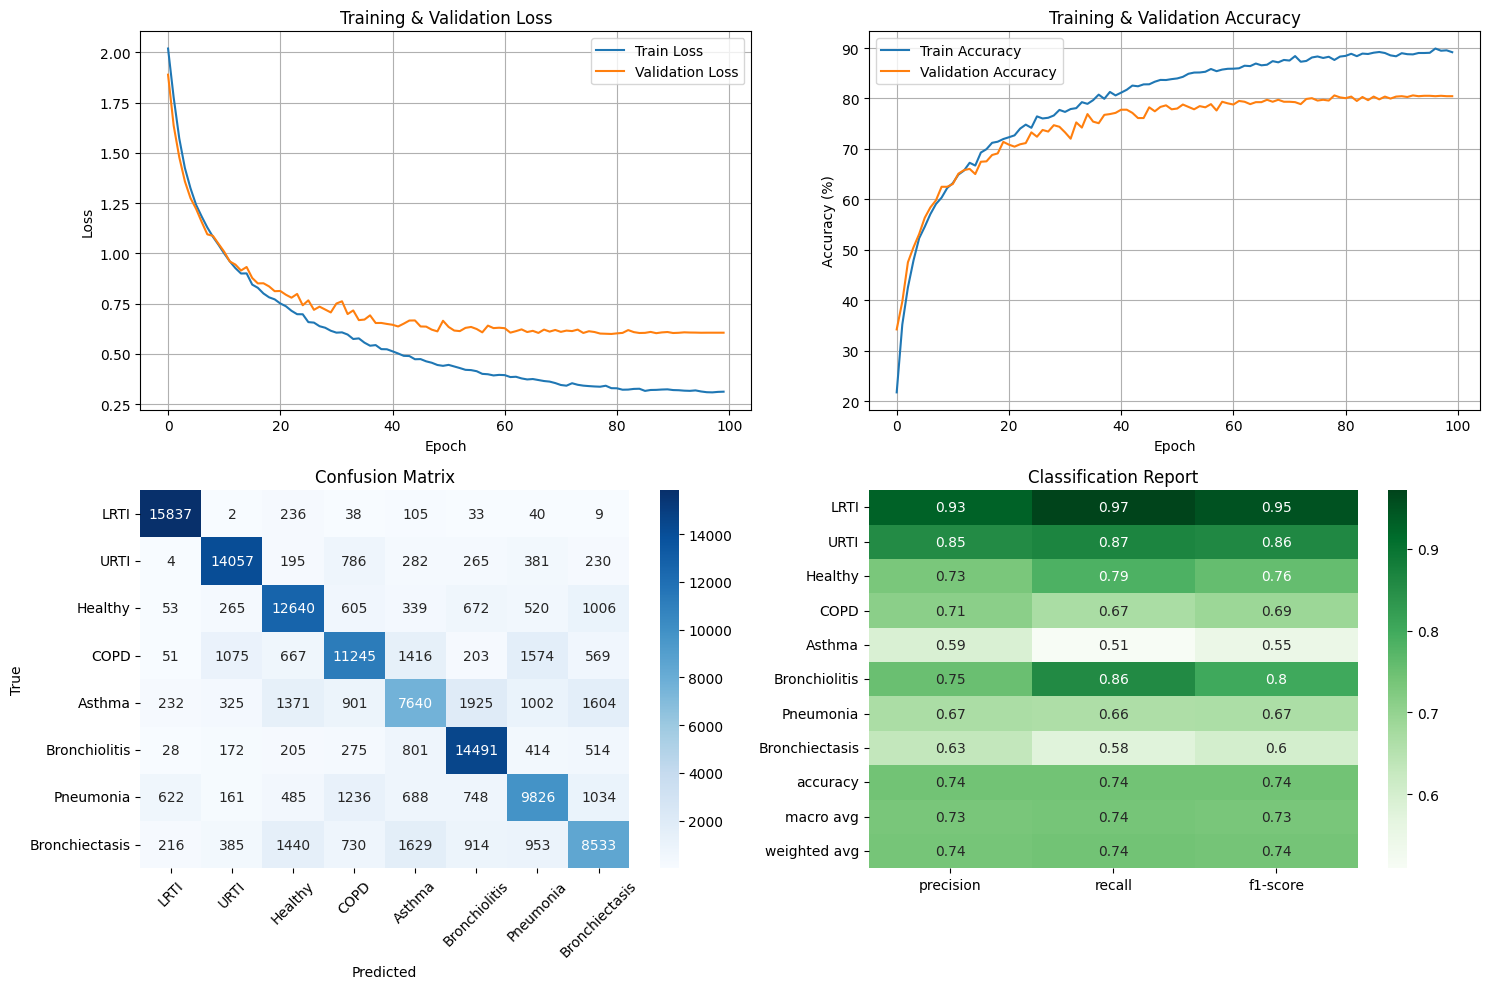

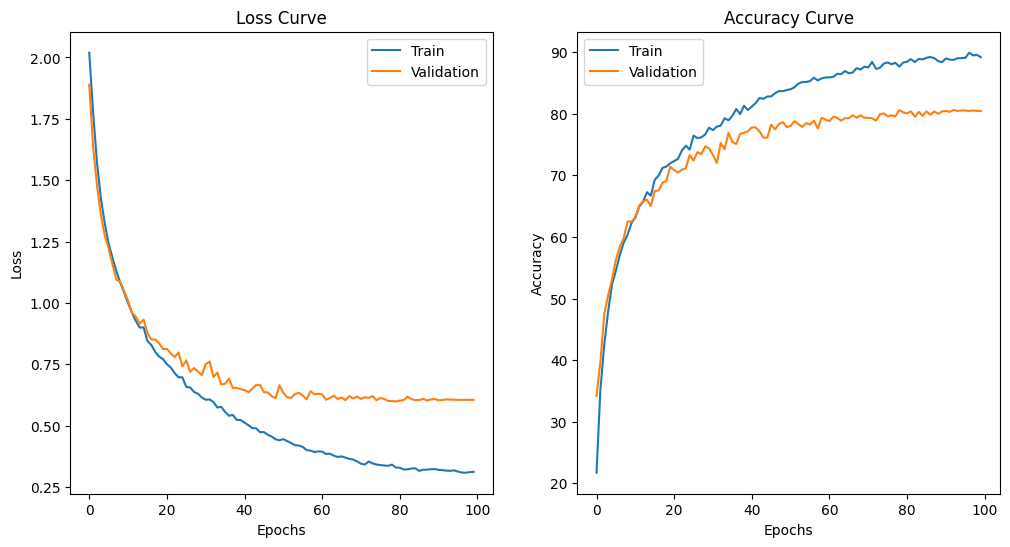

In [ ]:
# 2. Train with visualization
model, history = train_model_with_plots(
    train_dataset,
    val_dataset,
    num_epochs=100,
    batch_size=32,
    learning_rate=3e-5
)

In [ ]:


torch.save(model.state_dict(), "/content/drive/MyDrive/final_model.pth")


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

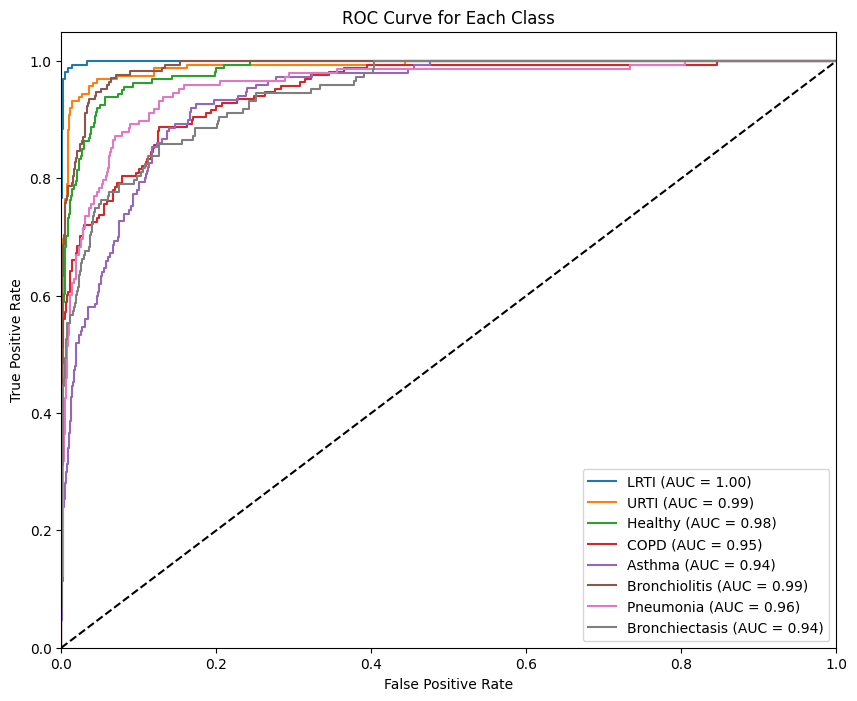

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import numpy as np

def plot_roc_curve(true_labels, pred_probs, class_names):
    plt.figure(figsize=(10, 8))
    for i, class_name in enumerate(class_names):
        fpr, tpr, _ = roc_curve((true_labels == i).astype(int), pred_probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Each Class')
    plt.legend(loc="lower right")
    plt.savefig('roc_curves.png')
    plt.show()

# Get prediction probabilities for ROC curve
def get_pred_probs(model, data_loader, device):
    model.eval()
    all_probs = []
    all_true = []
    with torch.no_grad():
        for embeddings, labels in data_loader:
            embeddings = embeddings.to(device)
            outputs = model(embeddings)
            probs = torch.softmax(outputs, dim=1)
            all_probs.extend(probs.cpu().numpy())
            all_true.extend(labels.argmax(dim=1).cpu().numpy())
    return np.array(all_probs), np.array(all_true)

val_loader = DataLoader(val_dataset, batch_size=32)
pred_probs, true_labels = get_pred_probs(model, val_loader, device)
plot_roc_curve(true_labels, pred_probs, class_names=df_train['label'].unique())

## FPT Dataset